IMPORTS


In [1]:
#PR06

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
#PR06

df=pd.read_csv("https://raw.githubusercontent.com/abdarker/dataset/master/NSE-TATA.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


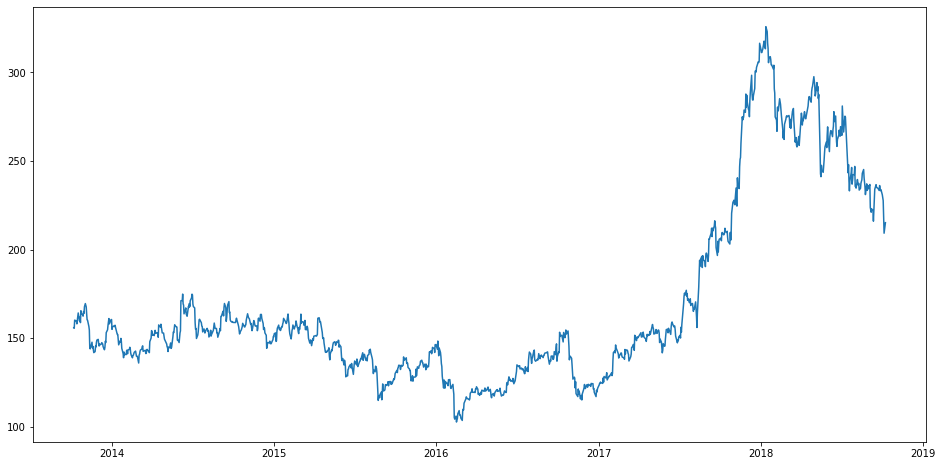

In [3]:
# 1

df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

sort the data and create new data with Date and Close Columns

In [4]:
# 2   

data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
  new_dataset["Date"][i]=data['Date'][i]
  new_dataset["Close"][i]=data["Close"][i]

Normalization of the newly set data

In [5]:
# 1 , 2

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset=new_dataset.values
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
  x_train_data.append(scaled_data[i-60:i,0])
  y_train_data.append(scaled_data[i,0])



Assigning and reshaping the train and test data

In [6]:
# 3

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

Building the LSTM model

In [7]:
# 3 , 2

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))


Visualization of inputs_Data

[[173.75]
 [175.4]
 [174.2]
 [177.0]
 [173.75]
 [175.15]
 [171.3]
 [172.2]
 [170.0]
 [171.15]
 [172.2]
 [168.4]
 [169.15]
 [169.55]
 [167.5]
 [165.1]
 [166.65]
 [166.45]
 [170.45]
 [166.0]
 [162.1]
 [156.0]
 [164.2]
 [178.75]
 [193.85]
 [190.6]
 [194.4]
 [196.15]
 [189.85]
 [196.55]
 [194.25]
 [193.3]
 [190.35]
 [197.05]
 [198.0]
 [197.6]
 [193.3]
 [196.7]
 [205.95]
 [205.75]
 [206.9]
 [209.25]
 [212.05]
 [207.3]
 [212.05]
 [210.55]
 [213.3]
 [216.2]
 [213.7]
 [212.2]
 [201.15]
 [196.65]
 [204.65]
 [198.6]
 [203.15]
 [205.8]
 [206.45]
 [204.95]
 [209.45]
 [209.6]
 [208.3]
 [208.45]
 [209.4]
 [212.0]
 [210.25]
 [209.6]
 [210.3]
 [206.8]
 [204.6]
 [203.1]
 [209.65]
 [205.3]
 [209.8]
 [220.5]
 [226.8]
 [226.95]
 [227.8]
 [226.35]
 [225.3]
 [234.7]
 [225.0]
 [224.5]
 [240.45]
 [236.15]
 [234.4]
 [246.7]
 [250.9]
 [251.95]
 [259.9]
 [274.9]
 [273.15]
 [274.05]
 [274.8]
 [278.7]
 [277.45]
 [287.75]
 [280.2]
 [287.1]
 [283.55]
 [279.05]
 [279.95]
 [274.95]
 [284.0]
 [288.45]
 [298.35]
 [287.8

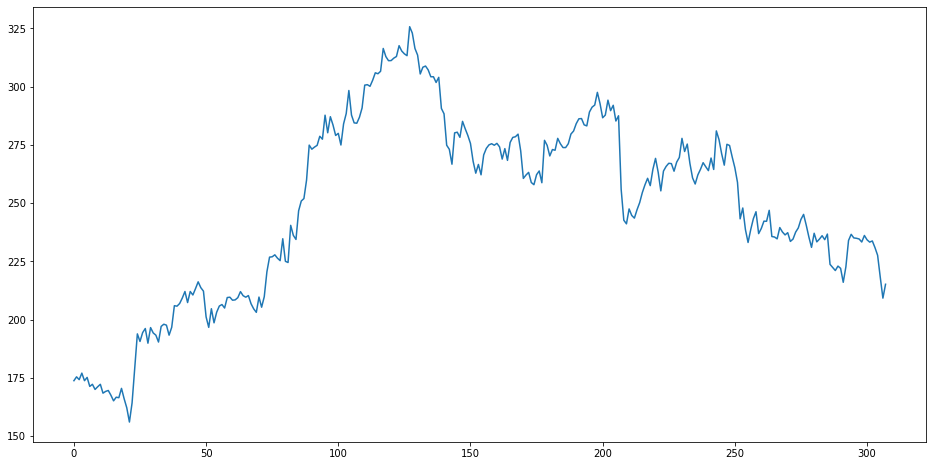

In [8]:
#PR06

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
print(inputs_data)
plt.figure(figsize=(16,8))
plt.plot(inputs_data)

 Assigning and Training the LSTM model with the new Dataset
 

In [9]:
#PR06

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 26s - loss: 0.0016 - 26s/epoch - 28ms/step


[[0.31869117]
 [0.32608696]
 [0.3207082 ]
 [0.33325863]
 [0.31869117]
 [0.32496638]
 [0.30770955]
 [0.31174361]
 [0.30188256]
 [0.3070372 ]
 [0.31174361]
 [0.29471089]
 [0.29807261]
 [0.29986553]
 [0.29067683]
 [0.27991932]
 [0.28686688]
 [0.28597042]
 [0.3038996 ]
 [0.28395338]
 [0.26647243]
 [0.23913043]
 [0.27588525]
 [0.34110264]
 [0.4087853 ]
 [0.39421784]
 [0.41125056]
 [0.41909458]
 [0.39085612]
 [0.42088749]
 [0.41057822]
 [0.40632004]
 [0.39309727]
 [0.42312864]
 [0.42738682]
 [0.4255939 ]
 [0.40632004]
 [0.42155984]
 [0.46302107]
 [0.46212461]
 [0.46727925]
 [0.47781264]
 [0.49036307]
 [0.46907216]
 [0.49036307]
 [0.48363962]
 [0.49596593]
 [0.50896459]
 [0.49775885]
 [0.49103541]
 [0.44150605]
 [0.42133572]
 [0.45719408]
 [0.4300762 ]
 [0.45047064]
 [0.46234872]
 [0.46526221]
 [0.45853877]
 [0.4787091 ]
 [0.47938144]
 [0.47355446]
 [0.4742268 ]
 [0.47848498]
 [0.49013895]
 [0.48229494]
 [0.47938144]
 [0.48251905]
 [0.46683102]
 [0.45696997]
 [0.45024653]
 [0.47960556]
 [0.46

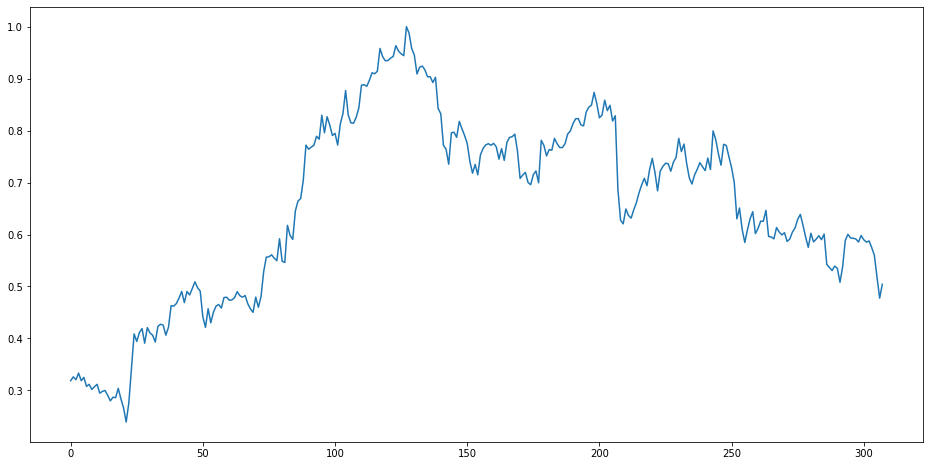

In [10]:
# 1

print(inputs_data)
plt.figure(figsize=(16,8))
plt.plot(inputs_data)

Testing the Model with a sample

In [11]:
# 3

X_test=[]
for i in range(60,inputs_data.shape[0]):
  X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [12]:
print(predicted_closing_price)

[[203.80508]
 [204.60593]
 [205.34433]
 [206.07411]
 [206.99818]
 [207.7694 ]
 [208.31494]
 [208.74748]
 [208.70853]
 [208.16966]
 [207.22882]
 [206.80939]
 [206.28122]
 [206.21056]
 [207.51562]
 [210.16724]
 [213.3991 ]
 [216.77554]
 [219.7731 ]
 [222.15663]
 [224.94188]
 [226.66544]
 [227.56401]
 [229.56624]
 [231.55319]
 [233.17888]
 [235.74895]
 [239.06828]
 [242.6423 ]
 [246.8987 ]
 [252.78162]
 [258.8849 ]
 [264.67645]
 [269.83154]
 [274.55872]
 [278.44443]
 [282.61307]
 [285.69513]
 [288.64154]
 [290.81064]
 [291.8304 ]
 [292.1806 ]
 [291.5298 ]
 [291.35062]
 [291.9117 ]
 [293.94193]
 [295.46414]
 [296.2238 ]
 [296.4496 ]
 [296.61023]
 [297.1441 ]
 [298.92123]
 [301.26877]
 [303.6784 ]
 [306.20605]
 [308.92432]
 [311.4567 ]
 [313.7738 ]
 [316.8459 ]
 [319.65875]
 [321.89386]
 [323.59912]
 [324.95038]
 [326.03952]
 [327.38977]
 [328.4921 ]
 [329.22717]
 [329.5918 ]
 [331.09595]
 [332.7701 ]
 [333.67978]
 [333.77063]
 [332.46725]
 [330.8086 ]
 [329.11078]
 [327.34546]
 [325.37158]

Saving the LSTM 


In [13]:
lstm_model.save("saved_model.h5")

splitting data and plotting train and remaining data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


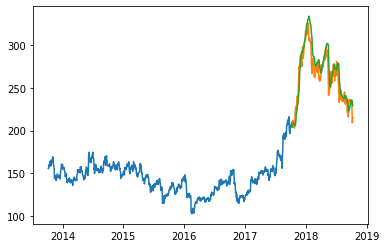

In [14]:
# 1
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

Plotting the data with the remaining valid_data only


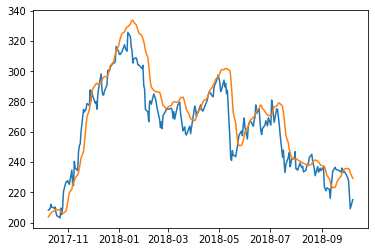

In [15]:
plt.plot(valid_data[['Close',"Predictions"]])

In [16]:
print(valid_data)

             Close  Predictions
Date                           
2017-10-09   208.3   203.805084
2017-10-10  208.45   204.605927
2017-10-11   209.4   205.344330
2017-10-12     212   206.074112
2017-10-13  210.25   206.998184
...            ...          ...
2018-10-01   230.9   235.766449
2018-10-03   227.6   235.635544
2018-10-04   218.2   234.877380
2018-10-05   209.2   232.824219
2018-10-08  215.15   229.260422

[248 rows x 2 columns]
